In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.DataFrame({
    "Match No.": [1]*12,
    "Innings": ["1st"]*12,
    "Team": ["Team A"]*12,
    "Player Name": ["Player 1", "Player 2", "Player 3", "Player 1", "Player 2", "Player 3",
                    "Player 1", "Player 2", "Player 3", "Player 1", "Player 2", "Player 3"],
    "Ballcount": [1,2,3,4,5,6,1,2,3,4,5,6],
    "Position": ["Point", "Cover", "Midwicket", "Point", "Cover", "Midwicket",
                 "Point", "Cover", "Midwicket", "Point", "Cover", "Midwicket"],
    "Short Description": [
        "Quick pickup and throw to keeper", "Fumble at cover", "Saved a certain boundary",
        "Catch taken", "Bad throw to bowler", "Dropped catch",
        "Direct hit run-out", "Clean stop", "Missed run-out",
        "Stopped two runs", "Throw to wrong end", "Caught & bowled attempt"
    ],
    "Pick": ["Clean Pick", "Fumble", "Clean Pick", "Catch", "Bad Throw", "Drop Catch",
             "Clean Pick", "Clean Pick", "Fumble", "Clean Pick", "Bad Throw", "Catch"],
    "Throw": ["Run Out", np.nan, np.nan, np.nan, "Missed Run Out", np.nan,
              "Run Out", np.nan, "Missed Run Out", np.nan, "Missed Run Out", np.nan],
    "Runs": [2, -1, 4, 0, -2, -4, 1, 2, -1, 2, -2, 0],
    "Overcount": [1,1,2,2,3,3,4,4,5,5,6,6],
    "Venue": ["Mumbai"]*12
})

# Display the dataset
print("Sample Data:")
display(data)

Sample Data:


,Match No.,Innings,Team,Player Name,Ballcount,Position,Short Description,Pick,Throw,Runs,Overcount,Venue
0,1,1st,Team A,Player 1,1,Point,Quick pickup and throw to keeper,Clean Pick,Run Out,2,1,Mumbai
1,1,1st,Team A,Player 2,2,Cover,Fumble at cover,Fumble,NaN,-1,1,Mumbai
2,1,1st,Team A,Player 3,3,Midwicket,Saved a certain boundary,Clean Pick,NaN,4,2,Mumbai
3,1,1st,Team A,Player 1,4,Point,Catch taken,Catch,NaN,0,2,Mumbai
4,1,1st,Team A,Player 2,5,Cover,Bad throw to bowler,Bad Throw,Missed Run Out,-2,3,Mumbai
5,1,1st,Team A,Player 3,6,Midwicket,Dropped catch,Drop Catch,NaN,-4,3,Mumbai
6,1,1st,Team A,Player 1,1,Point,Direct hit run-out,Clean Pick,Run Out,1,4,Mumbai
7,1,1st,Team A,Player 2,2,Cover,Clean stop,Clean Pick,NaN,2,4,Mumbai
8,1,1st,Team A,Player 3,3,Midwicket,Missed run-out,Fumble,Missed Run Out,-1,5,Mumbai
9,1,1st,Team A,Player 1,4,Point,Stopped two runs,Clean Pick,NaN,2,5,Mumbai


In [3]:
data['Throw'] = data['Throw'].fillna("No Throw")

In [4]:
performance = data.groupby("Player Name").agg({
    "Runs": ["sum", "count"],
    "Pick": lambda x: x.value_counts().to_dict(),
    "Throw": lambda x: x.value_counts().to_dict()
}).reset_index()

performance.columns = ["Player Name", "Total Runs Impact", "Fielding Events",
                       "Pick Types", "Throw Outcomes"]
print("\nFielding Performance Summary:")
display(performance)


Fielding Performance Summary:


,Player Name,Total Runs Impact,Fielding Events,Pick Types,Throw Outcomes
0,Player 1,5,4,"{'Clean Pick': 3, 'Catch': 1}","{'Run Out': 2, 'No Throw': 2}"
1,Player 2,-3,4,"{'Bad Throw': 2, 'Fumble': 1, 'Clean Pick': 1}","{'No Throw': 2, 'Missed Run Out': 2}"
2,Player 3,-1,4,"{'Clean Pick': 1, 'Drop Catch': 1, 'Fumble': 1...","{'No Throw': 3, 'Missed Run Out': 1}"


In [6]:
def detailed_summary(player_name):
    player_data = data[data["Player Name"] == player_name]
    print(f"\n--- Detailed Summary for {player_name} ---")
    print(player_data[["Overcount", "Ballcount", "Position", "Short Description", "Pick", "Throw", "Runs"]])
    total_saved = player_data[player_data['Runs'] > 0]['Runs'].sum()
    total_conceded = player_data[player_data['Runs'] < 0]['Runs'].sum()
    print(f"Runs Saved: {total_saved}")
    print(f"Runs Conceded: {total_conceded}")
    print(f"Net Impact: {total_saved + total_conceded}")

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Player Name", y=("Runs", "sum"), data=performance)
plt.title("Net Fielding Impact by Runs")
plt.ylabel("Runs Impact (Saved/Conceded)")
plt.xlabel("Player")
plt.axhline(0, color='gray', linestyle='--')
plt.show()

In [10]:
performance = data.groupby("Player Name").agg(
    total_runs_impact=("Runs", "sum"),
    fielding_events=("Runs", "count"),
    pick_types=("Pick", lambda x: x.value_counts().to_dict()),
    throw_outcomes=("Throw", lambda x: x.value_counts().to_dict())
).reset_index()


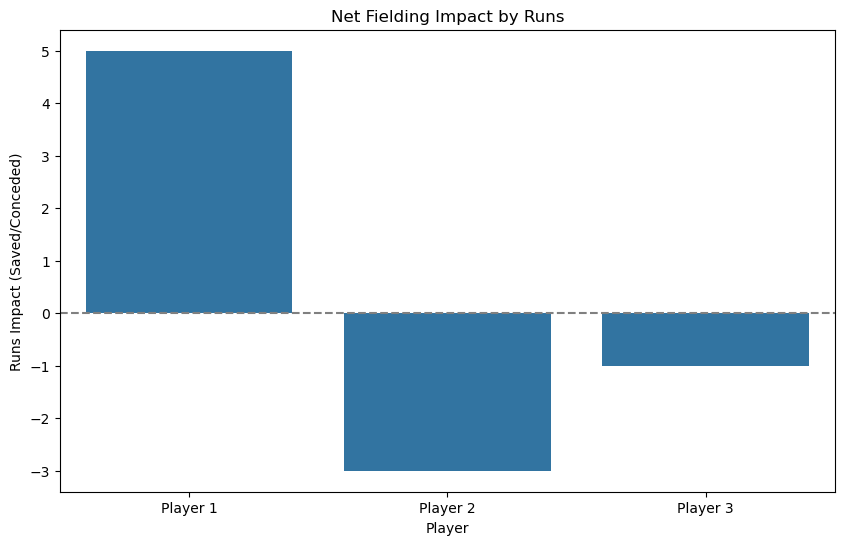

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Player Name", y="total_runs_impact", data=performance)
plt.title("Net Fielding Impact by Runs")
plt.ylabel("Runs Impact (Saved/Conceded)")
plt.xlabel("Player")
plt.axhline(0, color='gray', linestyle='--')
plt.show()


In [12]:
for player in ["Player 1", "Player 2", "Player 3"]:
    detailed_summary(player)


--- Detailed Summary for Player 1 ---
   Overcount  Ballcount Position                 Short Description  \
0          1          1    Point  Quick pickup and throw to keeper   
3          2          4    Point                       Catch taken   
6          4          1    Point                Direct hit run-out   
9          5          4    Point                  Stopped two runs   

         Pick     Throw  Runs  
0  Clean Pick   Run Out     2  
3       Catch  No Throw     0  
6  Clean Pick   Run Out     1  
9  Clean Pick  No Throw     2  
Runs Saved: 5
Runs Conceded: 0
Net Impact: 5

--- Detailed Summary for Player 2 ---
    Overcount  Ballcount Position    Short Description        Pick  \
1           1          2    Cover      Fumble at cover      Fumble   
4           3          5    Cover  Bad throw to bowler   Bad Throw   
7           4          2    Cover           Clean stop  Clean Pick   
10          6          5    Cover   Throw to wrong end   Bad Throw   

             Th